# Player's survival when throwing dices

[**Time-on-device-players-vs-gamblers**](https://www.casinoinside.ro/device-players-contra-gambleritime-on-device-players-vs-gamblers/?lang=en)

A low player's survival alias a fast pace of the math while keeping hold percentages constant leads to **Gamblers** vice versa to **Time-on-Device-players**.

The player's survival' **staying in the game** decreases with increasing the number of dices while keeping the rest constant. Here, increasing the dices means increasing the games' volatility and therefore having higher wins, but this also leads to longer lean periods and to a faster death. A game starts for each player having 20 free games, and according to the outcome of the game, the player can further gain further games resp. wins.

 - Part 3: Compute for one to eight dices the survival distributions and their KPIs
 - Part 4: Visualise and plot the results

Game set-up:
 - Initially, the payout profile of each dice is manipulated, but "fair" meaning, the dice returns statistically 100%. 
 - Payout: For {1,2} is 0, for {3,4,5} is 1 and for {6} is 3. Stake is 1.
 - For multiple dices these returns are multiplied.
 - Finally, the end-win is downgraded by the **return-to-player (RTP)**, here to 90%.
 
In [**Hypercycle**](https://nbviewer.jupyter.org/github/Gordi33/The-Laws-of-the-Game/blob/master/Hypercycle.ipynb) increasing the number of colours and dimensions is increasing the game's survival meaning, till **one-colour-takes-it-all** takes longer, whereas here increasing the number of dices leads to shorten the average player' lifetime.

Having a RTP < 100% is a necessary requirement otherwise the game is about to continue infinitely. Lowering the RTP leads to a faster average death. Another way to achieve a faster **player's death** is to gather all possible winnings in only a few outcome-events i.e, **skew the payout-profile** further. Depending on the game's complexity, two main KPIs to increase the average player's survival and therefor being more [**time-on-device**](https://mgtinc.net/time-on-device-the-problems-and-solutions-what-are-they/) is reducing the game's volatility and the payout-profile's skewness.

# Imports

In [1]:
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import PlayersSurvivalWhenThrowingDices

# Compute for one to eight dices the survival distributions
Part 3: Compute for one to eight dices the survival distributions and their KPIs

In [3]:
myDicesContainer = []
dices = [1,2,3,4,5,6,7,8]

for i in range(1, len(dices)+1):
    print("Playing with ", i, "dices")
    myDices_Game = PlayersSurvivalWhenThrowingDices.Dices_Game()
    myDices_Game.set_number_of_dices(i)
    myDices_Game.set_dices_prizes([0,0,1,1,1,3])
    myDices_Game.play_till_zero_n_times(100000)
    myDicesContainer.append(myDices_Game)
    del myDices_Game

# Visualise and plot results
Part 4: Distributions and their KPIs.

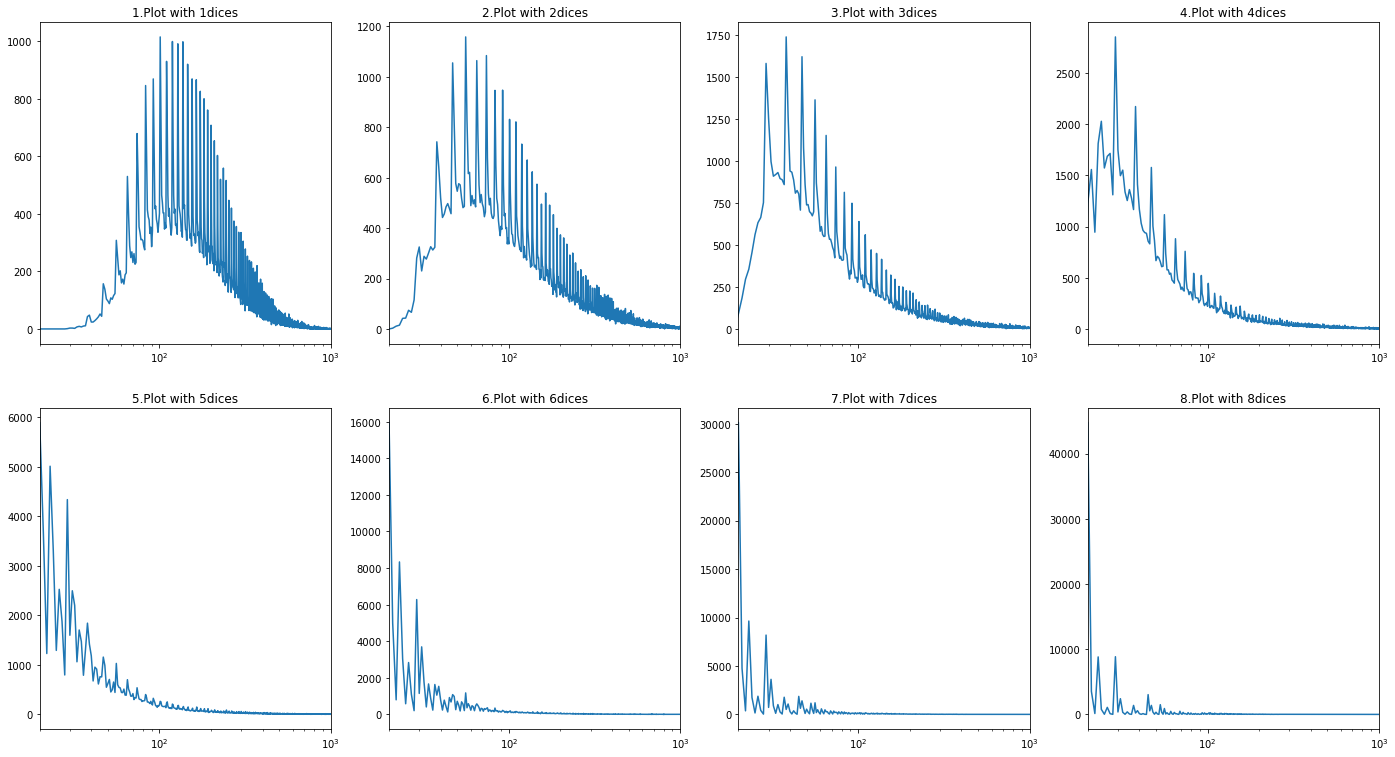

In [82]:
fig, ax = plt.subplots(2, 4, figsize = (24, 13))

for i in range(1, len(dices)+1):
    plt.subplot(2, 4, i)
    myDicesContainer[i-1].plot_dices_distribution(20, 1000)
    plt.title(str(i) + ".Plot with " + str(i) + "dices")

From one dice to having eight dices the distribution of how many games where played starts getting more and more right skewed. Meaning that with eight dices only a small fraction of the players played a higher number of games. Whereas with a low number of dices player on average get to throw the dices more often.

In [84]:
d = []
for i in range(0, len(dices)):
    d.append(myDicesContainer[i].get_dices_distribution_statistics().rename(columns = {'Statistic': 'Dices ' + str(i+1)}, inplace = False))
pd.concat([d[i] for i in range(0,len(dices))], axis=1 )             

,Dices 1,Dices 2,Dices 3,Dices 4,Dices 5,Dices 6,Dices 7,Dices 8
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,203.893970,203.284240,203.622620,207.191680,206.013850,202.925320,203.11816,198.426340
std,128.157307,222.288173,336.229869,500.802906,717.319029,1023.713213,1395.24804,1988.415497
min,29.000000,21.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
25%,115.000000,74.000000,49.000000,35.000000,28.000000,23.000000,20.00000,20.000000
50%,171.000000,129.000000,90.000000,62.000000,44.000000,32.000000,29.00000,23.000000
75%,254.000000,245.000000,205.000000,155.000000,108.000000,74.000000,54.00000,45.000000
max,1574.000000,4575.000000,6794.000000,13870.000000,26457.000000,56862.000000,84723.00000,164304.000000
median,171.000000,129.000000,90.000000,62.000000,44.000000,32.000000,29.00000,23.000000
mode,101.000000,56.000000,38.000000,29.000000,20.000000,20.000000,20.00000,20.000000


The volatility increases enormously and goes together with a low number of thrown dices. Playing the game with one dice shows that 50% of the population threw that dices at least 171 times whereas for players with eight dices that number decreases to 23 for 50% of the population.

Risk appetite alias Gamblers go for a high volatility, high wins, accept longer lean periods and therefore accept higher hitrates, but the price is a faster pace of the math resp. a shorter average survival.